In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import optimize

sp.init_printing(use_unicode=True)

In [3]:
class PIP:
    def __init__(self, p, f, getState):
        self.parameters = p
        self.f = f
        self.getSI = getState

    def getPIP(self,
        alpha_res = np.linspace(1,1.5,100),
        alpha_mut = np.linspace(1,1.5,100)):
        
        s, i = np.array([self.getState(x) for x in alpha_res]).transpose()
        print(s)
        print(i)
        a1,a2 = np.meshgrid(alpha_res, alpha_mut)
        l = len(alpha_mut)
        s=s.repeat(l).reshape((l,l)).transpose()
        i=i.repeat(l).reshape((l,l)).transpose()

        sol = np.empty((l**2))
        for counter, (res,mut,s,i) in enumerate(zip(a1.flatten(), a2.flatten(),s.flatten(), i.flatten())):
            sol[counter] = self.f(res,mut,s,i)
        sol = sol.reshape((l,l))
        h = plt.contourf(alpha_res,alpha_mut, sol)
        plt.axis('scaled')
        plt.colorbar()
        plt.show()

In [67]:
K = 50

def f(a_res, a_mut, S, I):
    return a_mut/(a_mut+c)*S - (d + a_mut*(1 + (I/k)) + t)


def getState(r, iterations):
    def eom(N):
        return N * r * np.exp(1-N/K)
    states = [1,]
    for i in range(iterations):
        states.append(eom(states[-1]))
    return states[-10:]


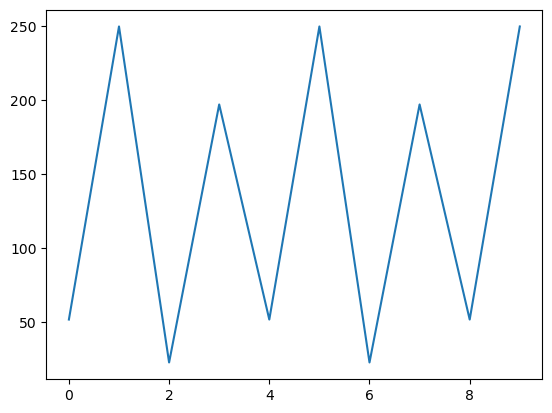

In [68]:

plt.plot(np.arange(10),getState(5,100))

In [139]:
K = 50


def getStates(r, iterations=100):
    r1,r2 =r
    def eom(N):
        return [N[0] * r1 * np.exp(1-(N[0]+N[1])/K), N[1] * r2 * np.exp(1-(N[0]+N[1])/K)]
    states = [(1,1),]
    for i in range(iterations):
        states.append(eom(states[-1]))
    return  np.arange(iterations+1), states

9.158064408012098


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

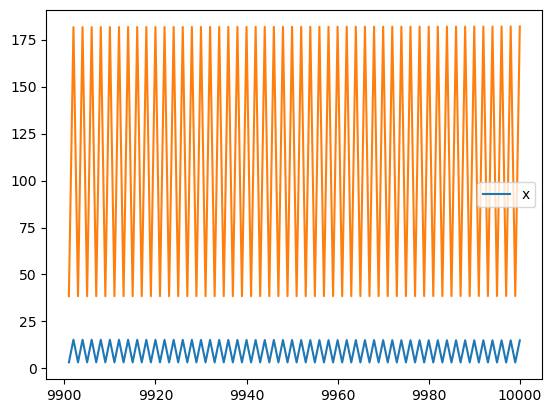

In [137]:
time, states = getStates(4,4.001,10000)
x1,x2 = np.array(states).transpose()
print(np.mean(x1[-100:]))
plt.plot(time[-100:], x1[-100:], label="x")
plt.plot(time[-100:], x2[-100:])
plt.legend()

In [159]:
def getStates(r, iterations=10000):
    r1,r2 =r
    def eom(N):
        return [N[0] * r1 * np.exp(1-(N[0]+N[1])/K), N[1] * r2 * np.exp(1-(N[0]+N[1])/K)]
    states = [(1,1),]
    for i in range(iterations-100):
        states[-1] = eom(states[-1])
    for i in range(100):
        states.append(eom(states[-1]))
    return  np.arange(iterations+1), states

def evolution(mutationstep=0.01):
    r = [(5.1, 5.11)]
    e = []
    while True:
        time, states = getStates(r[-1],10000)
        x1,x2 = np.array(states).transpose()

        f1 = np.mean(x1[-100:])
        f2 = np.mean(x2[-100:])
        e.append((f1,f2))
        if np.isclose(f1,f2, atol = 10):
            break
        elif f1 < f2:
            r.append((r[-1][1],r[-1][1] + mutationstep))
        #elif f1 > f2 :
        #    r.append((r[-1][0],r[-1][1]/2))
    return r, e
sol = evolution()

KeyboardInterrupt: 

In [156]:
print(np.array(sol[0]).transpose())
print(np.array(sol[1]).transpose())

[[5.1   5.101 5.102 ... 6.893 6.894 6.895]
 [5.101 5.102 5.103 ... 6.894 6.895 6.896]]
[[59.62315325 59.62878863 59.63442286 ... 68.23934925 68.17709461
  67.57789822]
 [71.84423198 71.84839842 71.85256409 ... 78.32658152 78.2532564
  77.56789588]]
